In [1]:
%matplotlib inline
import skyflux as sf

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [3]:
arbitrary_source = sf.catalog.obj_catalog[999]
arb_ra = arbitrary_source.ra_angle
arb_dec = arbitrary_source.dec_angle
J = sf.stokes.create_J(ra=arb_ra, dec=arb_dec)
J.shape
J

array([[[-0.00445215+0.00414755j,  0.00867337+0.01154506j],
        [-0.01057595-0.0118178j ,  0.0197611 +0.01426001j]]])

In [4]:
arb_ra = sf.rot.get_lst(radians=False)
arb_dec = sf.rot.hera_lat
print(sf.rot.hera_lat)
J = sf.stokes.create_J(ra=arb_ra, dec=arb_dec, lst=sf.rot.get_lst(radians=False), radians=False)

-30.72138888888889


In [5]:
J

array([[[ 8.12625503e-01-5.82786230e-01j,
         -2.80442983e-05-3.17184224e-05j],
        [ 2.80442986e-05+3.17184229e-05j,
          8.12625503e-01-5.82786230e-01j]]])

In [6]:
Am = sf.stokes.create_A(ra=arb_ra, dec=arb_dec, radians=False)
print(Am)
Am.shape

[[[ 9.99999903e-01-2.67948203e-09j -1.34393865e-05-2.86790914e-05j
    2.86770852e-05-1.34373807e-05j -1.52345708e-05-4.21163468e-05j]]

 [[-2.86803487e-05+1.34406838e-05j  1.00004201e+00-1.52382824e-05j
    6.39139880e-09+1.42215169e-09j  1.34406834e-05+2.86803488e-05j]]

 [[ 1.34386773e-05+2.86783425e-05j  3.83714516e-09+1.38255872e-09j
    9.99957775e-01+1.52410871e-05j -2.86783425e-05+1.34386775e-05j]]

 [[ 1.52447993e-05+4.21191516e-05j  2.86790913e-05-1.34393867e-05j
   -1.34373803e-05-2.86770853e-05j  9.99999903e-01-1.25228383e-10j]]]


(4, 1, 4)

In [7]:
Am[0][0][0]

(0.9999999027607387-2.679482025181332e-09j)

In [8]:
# Display available antennae
print(sf.demo.active_ants)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 27, 36, 37, 38, 39, 40, 41, 50, 51, 52, 53, 54, 55, 65, 66, 67, 68, 69, 70, 71, 82, 83, 84, 85, 86, 87, 88, 98, 120, 121, 122, 123, 124, 136, 137, 138, 139, 140, 141, 142, 143]


In [9]:
# we sample three arbitrary sources, and 2/3 are zero
print(arbitrary_source)
print(sf.vis.visibility(2, 11, arbitrary_source))

print(sf.vis.visibility(36, 37, sf.catalog.obj_catalog[981]))
print(sf.vis.visibility(88, 121, sf.catalog.obj_catalog[134]))
# also, would we not expect the first term to dominate? And yet it is not even the largest
    # of numbers all with magnitudes less than one

Name: GLEAM J185915-381842
Right ascension: 284.8155
Declination: -37.688250000000004
151 MHz flux: 1.2316479999999999

[-2.54538873e-05-8.09194236e-05j  8.89743857e-05-1.24570760e-05j
  1.57105852e-04-1.87177143e-04j -5.15467771e-05-1.36342330e-05j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[-0.00098156+1.24799422e-03j -0.00032411-3.01965707e-05j
  0.00036518+3.91335796e-04j  0.00077052-2.36683408e-04j]


In [10]:
ra = np.radians(arbitrary_source.ra_angle)
dec = np.radians(arbitrary_source.dec_angle)

r = sf.rot.radec2lm(ra, dec, ra0=0)

print(r)

print(sf.ant.baseline(88, 121)[0:2])

(0.7650399362195128, 0.4221916341590066)
[-43.92014994  25.13624112]


In [11]:
"""
This section kills the kernel! Do NOT run it!!
I am leaving it here as a to-do of sorts. I think, that my inability
to run it in this environment may be a bad sign.
(It does work fine in the shell, so far as I can tell.)

t = 0
arg = 134

obj = flux.catalog.obj_catalog[arg]
ra = np.radians(obj.ra_angle)
dec = np.radians(obj.dec_angle)
while t < 2 * np.pi:
    print(t)
    t += np.pi / 72
    
    print(flux.stokes.J_matrix(ra, dec, t))
    print("\n")

"""

'\nThis section kills the kernel! Do NOT run it!!\nI am leaving it here as a to-do of sorts. I think, that my inability\nto run it in this environment may be a bad sign.\n(It does work fine in the shell, so far as I can tell.)\n\nt = 0\narg = 134\n\nobj = flux.catalog.obj_catalog[arg]\nra = np.radians(obj.ra_angle)\ndec = np.radians(obj.dec_angle)\nwhile t < 2 * np.pi:\n    print(t)\n    t += np.pi / 72\n    \n    print(flux.stokes.J_matrix(ra, dec, t))\n    print("\n")\n\n'

In [23]:
vist = sf.vis.source_over_time(
    88, 121, arbitrary_source, np.pi, 2 * np.pi, np.pi / 288
)
vist

//anaconda3/envs/hera/lib/python3.8/site-packages/skyflux/vis.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([lst, visibility(ant1, ant2, source, nu, time=lst)])


array([[3.141592653589793,
        array([-0.00021457-6.59739467e-05j, -0.00046671-8.84216134e-05j,
        0.00023544-4.41288573e-04j,  0.0012934 +6.56515482e-04j])],
       [3.152500961414758,
        array([-0.00021662-7.56948034e-05j, -0.0004705 -1.02492593e-04j,
        0.00025463-4.39338754e-04j,  0.0012617 +7.02710502e-04j])],
       [3.1634092692397227,
        array([-0.00021678-8.85459674e-05j, -0.0004725 -1.22991273e-04j,
        0.00027985-4.33049370e-04j,  0.0012158 +7.62124041e-04j])],
       [3.1743175770646874,
        array([-0.00021452-0.00010441j, -0.00047189-0.00015001j,
        0.00031082-0.00042138j,  0.00115386+0.00083231j])],
       [3.185225884889652,
        array([-0.0002092 -0.00012301j, -0.00046755-0.00018351j,
        0.00034701-0.00040303j,  0.0010739 +0.00091002j])],
       [3.196134192714617,
        array([-0.00020011-0.00014388j, -0.0004581 -0.00022321j,
        0.00038747-0.00037652j,  0.00097409+0.00099116j])],
       [3.2070425005395817,
        ar

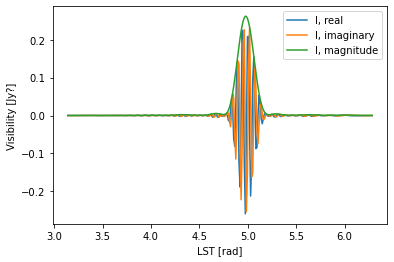

In [24]:
I = np.array([v[1][0] for v in vist])

plt.plot(vist[:, 0], np.real(I), label="I, real")
plt.plot(vist[:, 0], np.imag(I), label="I, imaginary")
plt.plot(vist[:, 0], np.abs(I), label="I, magnitude")

plt.xlabel("LST [rad]")
plt.ylabel("Visibility [Jy?]")

plt.legend()
plt.show()

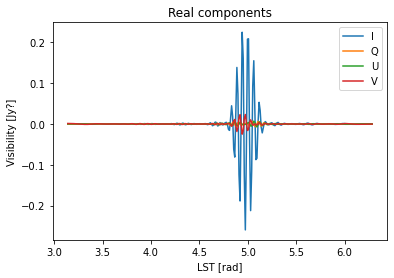

In [25]:
Q = np.array([v[1][1] for v in vist])
U = np.array([v[1][2] for v in vist])
V = np.array([v[1][3] for v in vist])

plt.plot(vist[:, 0], np.real(I), label="I")
plt.plot(vist[:, 0], np.real(Q), label="Q")
plt.plot(vist[:, 0], np.real(U), label="U")
plt.plot(vist[:, 0], np.real(V), label="V")

plt.xlabel("LST [rad]")
plt.ylabel("Visibility [Jy?]")
plt.title("Real components")

plt.legend()
plt.show()

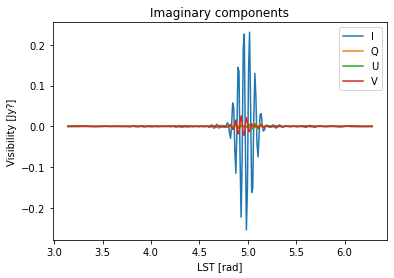

In [26]:
plt.plot(vist[:, 0], np.imag(I), label="I")
plt.plot(vist[:, 0], np.imag(Q), label="Q")
plt.plot(vist[:, 0], np.imag(U), label="U")
plt.plot(vist[:, 0], np.imag(V), label="V")

plt.xlabel("LST [rad]")
plt.ylabel("Visibility [Jy?]")
plt.title("Imaginary components")

plt.legend()
plt.show()

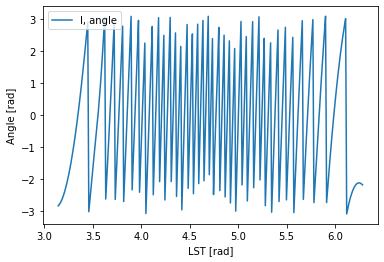

In [27]:
plt.plot(vist[:, 0], np.angle(I), label="I, angle")

plt.xlabel("LST [rad]")
plt.ylabel("Angle [rad]")

plt.legend()
plt.show()

[3.141592653589793, 3.1525009614147574, 3.163409269239722, 3.1743175770646865, 3.1852258848896513, 3.196134192714616, 3.2070425005395804, 3.217950808364545, 3.2288591161895095, 3.2397674240144743, 3.2506757318394386, 3.2615840396644034, 3.2724923474893677, 3.2834006553143325, 3.2943089631392968, 3.3052172709642615, 3.316125578789226, 3.3270338866141906, 3.337942194439155, 3.3488505022641197, 3.359758810089084, 3.370667117914049, 3.381575425739013, 3.392483733563978, 3.4033920413889427, 3.414300349213907, 3.425208657038872, 3.436116964863836, 3.447025272688801, 3.457933580513765, 3.46884188833873, 3.4797501961636943, 3.490658503988659, 3.5015668118136234, 3.512475119638588, 3.5233834274635525, 3.5342917352885173, 3.5452000431134816, 3.5561083509384463, 3.5670166587634107, 3.5779249665883754, 3.5888332744133398, 3.5997415822383045, 3.6106498900632693, 3.6215581978882336, 3.6324665057131984, 3.6433748135381627, 3.6542831213631275, 3.665191429188092, 3.6760997370130566, 3.687008044838021, 

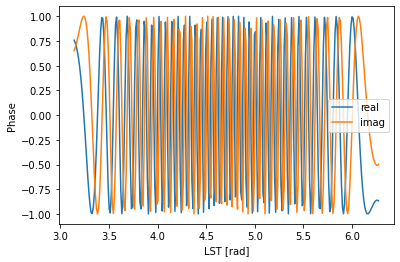

In [28]:
ra = np.radians(arbitrary_source.ra_angle)
dec = np.radians(arbitrary_source.dec_angle)
lst_list = [np.pi / 288 * i for i in range(288, 576)]

print(lst_list)

phases = np.array([sf.ant.phase_factor(88, 121, sf.rot.radec2lm(ra, dec, ra0=lst)) for lst in 
    lst_list
])
plt.plot(lst_list, np.real(phases), label="real")
plt.plot(lst_list, np.imag(phases), label="imag")

plt.xlabel("LST [rad]")
plt.ylabel("Phase")

plt.legend()
plt.show()

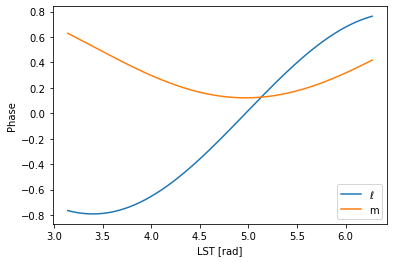

In [29]:
lst_list = [np.pi / 288 * i for i in range(288, 576)]

list_r = np.array([sf.rot.radec2lm(ra, dec, ra0=lst) for lst in 
    lst_list
])
plt.plot(lst_list, list_r[:, 0], label="$\ell$")
plt.plot(lst_list, list_r[:, 1], label="m")

plt.xlabel("LST [rad]")
plt.ylabel("Phase")

plt.legend()
plt.show()

[-0.00016697+7.30723975e-05j -0.00010285+1.38999206e-04j
  0.00012505+2.93076384e-05j  0.0006985 +1.70176454e-04j]


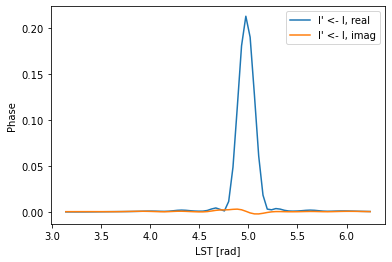

In [19]:
# this section is wrong. The A matrix should get 

lst_list = [np.pi / 288 * i for i in range(288, 576)]

list_A = np.array([sf.stokes.create_A(ra=ra, dec=dec, lst=lst, radians=True) for lst in 
    lst_list
])

print(list_A[0][0][0])

plt.plot(lst_list, np.real(list_A[:, 0, 0, 0]), label="I' <- I, real")
plt.plot(lst_list, np.imag(list_A[:, 0, 0, 0]), label="I' <- I, imag")

plt.xlabel("LST [rad]")
plt.ylabel("Phase")

plt.legend()
plt.show()

In [20]:
print("The following is the universal baseline")
print(sf.ant.baseline(88, 121))

The following is the universal baseline
[-43.92014994  25.13624112  -0.34038648]


In [21]:
len(sf.catalog.obj_catalog)

3872